In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
df = pd.read_csv('B-factor_ThR.csv')
df['res-2'] = df.Res**(-2) # y
df['lnN'] = np.log(df.N) # x

Con1
linear fit slope and intercept: [31.59782755] 6.662031777838518
linear fit R2: 0.9881997809054991
B-factor: 63.195655107912444
Con2
linear fit slope and intercept: [33.04633446] 6.268098862113735
linear fit R2: 0.9597328940345973
B-factor: 66.09266891625684


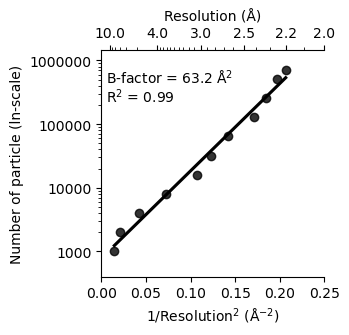

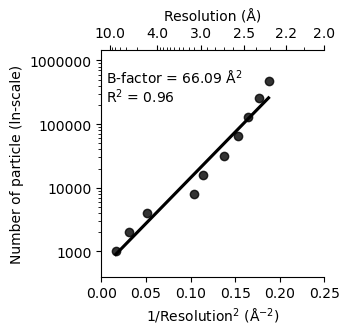

In [3]:
# set desired tick locations
desired_resolutions = np.array([10,4,3,2.5,2.2,2])
desired_res_minor = np.array([9,8,7,6,5,3.9,3.8,3.7,3.6,3.5,3.4,3.3,3.2,3.1,2.9,2.8,2.7,2.6,2.4,2.3,2.1])
desired_particle_counts = np.array([1000,10000,100000,1000000])

# for each map
for mp,map_df in df.groupby('map'):

    # plot scatter points with 
    g = sns.lmplot(map_df,x='res-2', y='lnN',ci=None, 
               line_kws={'color': 'black'},
              scatter_kws={'color': 'black'},
                  height = 3)

    # format ticks and axis limits
    g.ax.set_yticks(np.log(desired_particle_counts),desired_particle_counts)
    minor_ticks = []
    desired_particle_counts = [0] + desired_particle_counts
    for i in range(len(desired_particle_counts)-1):
        ticks = np.array(range(int(desired_particle_counts[i]),int(desired_particle_counts[i+1]),int(desired_particle_counts[i+1]/10)))[1:]
        ticks = np.log(ticks)
        minor_ticks.extend(ticks)
    g.ax.set_yticks(minor_ticks, minor=True)
    res_axis = g.ax.secondary_xaxis('top')
    res_axis.set_xticks(desired_resolutions**(-2),desired_resolutions)
    res_axis.set_xticks(desired_res_minor**(-2),minor=True)
    g.ax.set_ylim([6,14.2])
    g.ax.set_xlim([0,0.25])
    
    # calculate R2
    model = LinearRegression()
    model.fit(np.expand_dims(map_df['res-2'],axis=1), map_df['lnN'])
    r_squared = model.score(np.expand_dims(map_df['res-2'],axis=1), map_df['lnN'])
    print(mp)
    print('linear fit slope and intercept:', model.coef_,model.intercept_)
    print('linear fit R2:',r_squared)
    print('B-factor:',model.coef_[0]*2)

    # label diagram
    g.ax.set_xlabel('1/Resolution$^2$ (Å$^{-2}$)')
    g.ax.set_ylabel('Number of particle (ln-scale)')
    res_axis.set_xlabel('Resolution (Å)')
    plt.text(0.005,13,f'B-factor = {round(model.coef_[0]*2,2)} Å$^{2}$')
    plt.text(0.005,12.3,f'R$^{2}$ = {round(r_squared,2)}')
    
    plt.savefig(f'bfactor_{mp}.png',dpi=400,bbox_inches='tight')
    plt.savefig(f'bfactor_{mp}.svg')